In [1]:
import matplotlib.pyplot as plt
import cv2

# K Nearest Neighbour Matching

## Overview of keypoint matching
Step 1: Find a set of distinctive key-points<br><br>
Step 2: Extract and normalize the region content<br><br>
Step 3: Define a region around each keypoint<br><br>
Step 4: Compute a local descriptor from normalized region<br><br>
Step 5: Match local descriptors<br><br>

## KNN Algorithm
Step 1: Load the data<br><br>
Step 2: Initialize K to chosen number of neighbors<br><br>
Step 3: For each example in the data:<br>
- Calculate the distance between the query example and the current example from the data.
- Add the distance and the index of the example to an ordered collection

a. Euclid distance:
\begin{equation*}
d(p, q) = \sqrt{\sum_{i - 1}^N (q_i - p_i)^2}
\end{equation*}
b. Manhattan distance:
\begin{equation*}
d(p, q) = \sum_{i - 1}^N |q_i - p_i|
\end{equation*}

Step 4: Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances<br><br>
Step 5: Pick the first K entries from the sorted collection<br><br>
Step 6: Get the labels of the selected K entries<br><br>
Step 7: 
- If regression, return the mean of the K labels<br>
- If classification, return the mode of the K labels<br>

Nearest neighbor matching is also known as greedy matching. It involves running through the list of treated units and selecting the closest eligible control unit to be paired with each treated unit. It is greedy in the sense that each pairing occurs without reference to how other units will be or have been paired, and therefore does not aim to optimize any criterion

### KNN matcher in openCV

<strong>knnMatch(queryDescriptors, trainDescriptor, matches, k, mask, compactResult)</strong><br>
Finds the k best matches for each descriptor from a query set.<br>
Parameters:<br>
- queryDescriptors: Query set of descriptors.
- trainDescriptors: Train set of descriptors.
- mask: Mask specifying permissible matches between an input query and train matrices of descriptors.
- matches: Matches. Each matches[i] is k or less matches for the same query descriptor.
- k: Count of best matches found per each query descriptor or less if a query descriptor has less than k possible matches in total.
- compactResult: Parameter used when the mask (or masks) is not empty. <br>
If compactResult is false, the matches vector has the same size as queryDescriptors rows. <br>
If compactResult is true, the matches vector does not contain matches for fully masked-out query descriptors.


In [2]:
def knnMatch(img1, img2):
    # convert img to grayscale
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # find keypoints and their descriptor
    # using SIFT
    sift = cv2.SIFT_create()

    kp1, des1 = sift.detectAndCompute(img1_gray,None)
    kp2, des2 = sift.detectAndCompute(img2_gray,None)
    print("Number of keypoints in img 1: ", len(kp1))
    print("Number of keypoints in img 2: ", len(kp2))

    # match local descriptor
    # using KNN matching
    bf = cv2.BFMatcher() 
    matches = bf.knnMatch(des1, des2, k=2)    # match descriptor
    print("Number of match: ", len(matches))

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    print("Number of good match: ", len(good))
            
    # cv2.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(img1_gray, kp1, img2_gray, kp2, matches, None, flags=2)
    plt.figure(figsize = (15, 115))
    plt.title("If not apply ratio test")
    plt.imshow(img3),plt.show()

    img4 = cv2.drawMatchesKnn(img1_gray, kp1, img2_gray, kp2, good, None, flags=2)
    plt.figure(figsize = (15, 115))
    plt.title("When apply ratio test")
    plt.imshow(img4),plt.show()

Number of keypoints in img 1:  6022
Number of keypoints in img 2:  10835
Number of match:  6022
Number of good match:  39


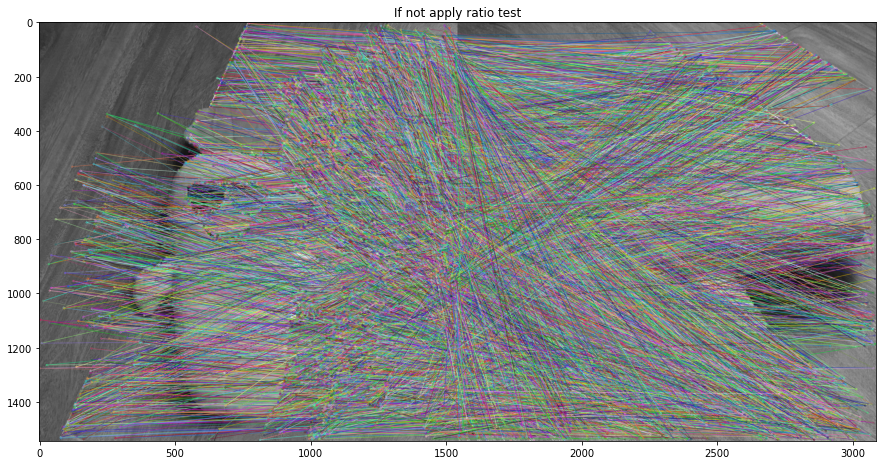

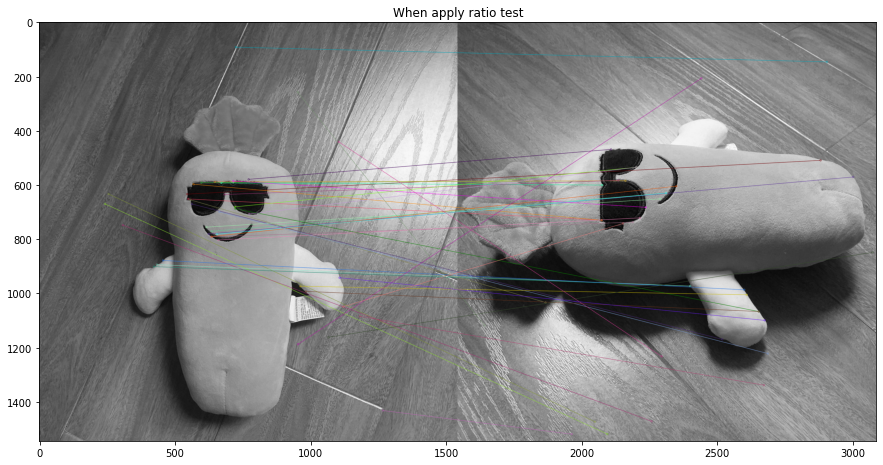

In [3]:
img1 = cv2.imread("../carot1.jpg")
img2 = cv2.imread("../carot2.jpg")
knnMatch(img1, img2)

https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.182.192&rep=rep1&type=pdf <br><br>
https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/ <br><br>
https://realpython.com/knn-python/ 